In [55]:
# 📊 Customer Churn Analysis
# Dataset: Telco Customer Churn  
# Tools: Python (pandas, seaborn, matplotlib)

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")

In [57]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
# Data Cleaning

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace = True)
df['tenure'] = df['tenure'].astype(int)
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x : 'Yes' if x == 1 else 'No')

In [60]:
cols_to_clean = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                 'MultipleLines']
for col in cols_to_clean:
    df[col] = df[col].replace({'No internet service' : 'No', 'No phone service' : 'No'})

In [61]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
# EDA

# Overall churn rate
df['Churn'].value_counts(normalize = True) * 100

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

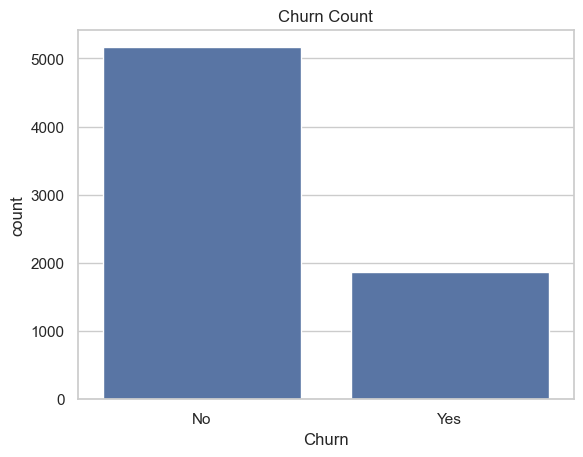

In [63]:
sns.countplot(x = 'Churn', data = df)
plt.title('Churn Count')
plt.show()

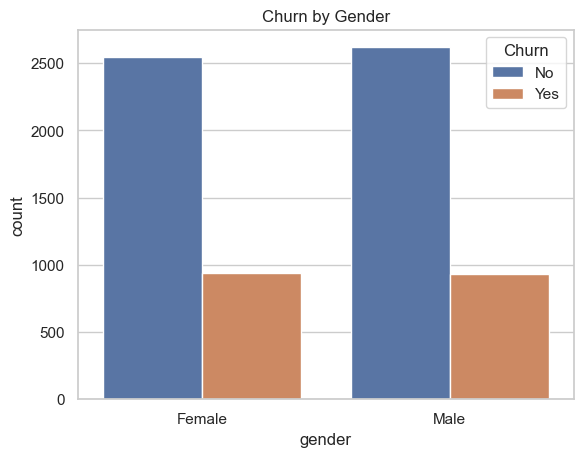

In [64]:
# churn by gender

sns.countplot(x = 'gender', hue = 'Churn', data = df)
plt.title('Churn by Gender')
plt.show()

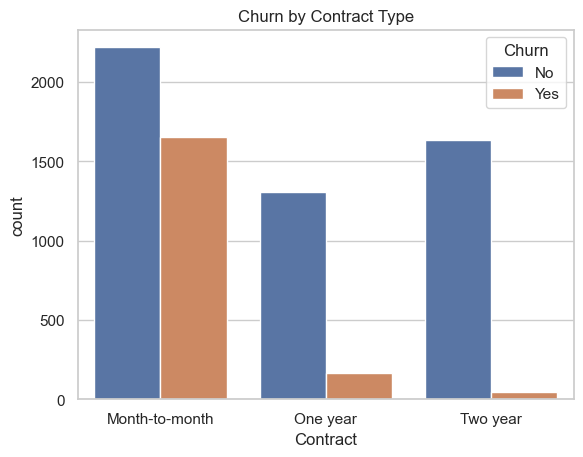

In [65]:
# churn by contract type

sns.countplot(x = 'Contract', hue = 'Churn', data = df)
plt.title('Churn by Contract Type')
plt.show()

# Customers on month-to-month contracts are likely to churn more than those on 1 or 2-year contracts.

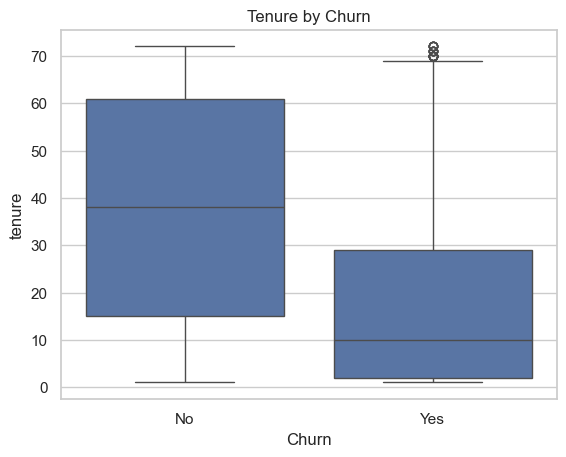

In [66]:
# Tenure vs Churn

sns.boxplot(x = 'Churn', y = 'tenure', data = df)
plt.title('Tenure by Churn')
plt.show()

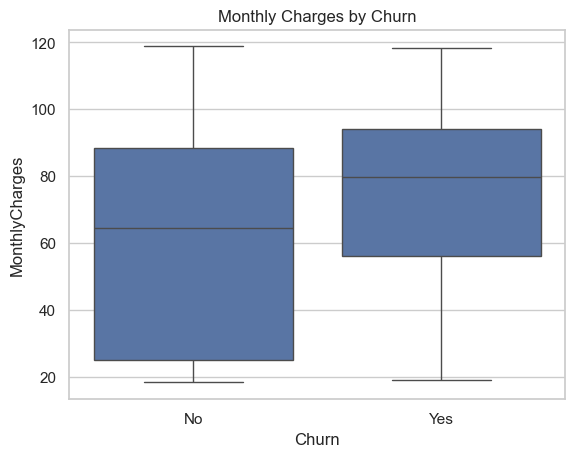

In [67]:
# Monthly charges vs Churn

sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = df)
plt.title('Monthly Charges by Churn')
plt.show()

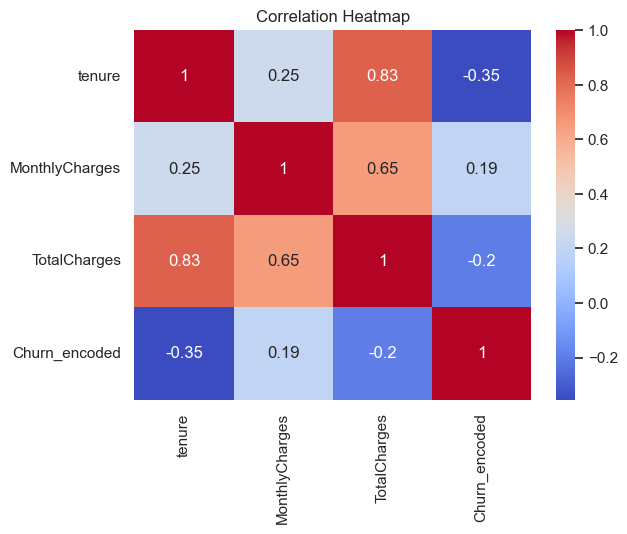

In [68]:
# Encode churn to 0/1 so we can measure correlation
df['Churn_encoded'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Only numerical columns
numerics = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_encoded']]

sns.heatmap(numerics.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [69]:
df.to_csv('cleaned_telco_churn.csv', index = False)